In [1]:
import torch
import numpy as np
import sympy
from core.hamiltonian import ChainPendulum, EuclideanAndGravityDynamics, Animation2d
from torchdiffeq import odeint
from IPython.display import HTML
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [3]:
body = ChainPendulum(3)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]
bs,_,n,d = z0.shape
z0 = z0.reshape(bs,2,n*d).reshape(bs,2*n*d)

In [4]:
z0.shape

torch.Size([1, 12])

In [5]:
ts = torch.linspace(0,1,100)

In [6]:
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-4, method='rk4').permute(1, 0, 2)

In [7]:
zs.shape

torch.Size([1, 100, 12])

In [8]:
xt = zs.reshape(1,len(ts),2,3,2)[0,:,0].permute(1,2,0)

In [9]:
#xt

In [10]:
# x = xt[:,0,1]
# y = xt[:,1,1]
# plt.plot(x,y)

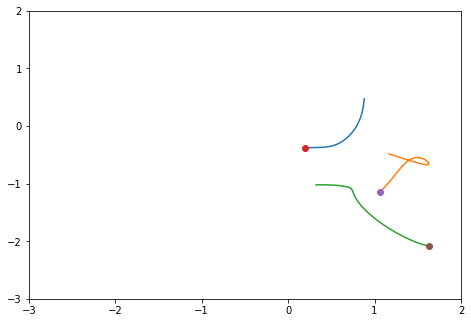

In [11]:
HTML(Animation2d(xt).animate().to_html5_video())

In [17]:
A.animate()

NameError: name 'A' is not defined

In [ ]:
plt.plot(xt)